In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from keras.utils import to_categorical

In [4]:
from keras.datasets import fashion_mnist

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

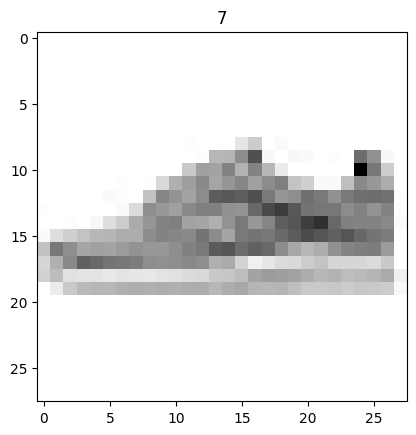

In [9]:
img_index = 666
plt.imshow(X_train[img_index], plt.cm.binary)
plt.title(y_train[img_index])
plt.show()

In [10]:
X_train = X_train.reshape(60_000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=3)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
cnn = Sequential()

cnn.add(Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), activation='relu',input_shape=(28, 28, 1) ))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(filters=6, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D())


cnn.add(Conv2D(filters=12, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=24, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 dropout (Dropout)           (None, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 3)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 6)         168       
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 6)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 6)          0         
 2D)                                                    

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
es = EarlyStopping(monitor='val_loss', patience=5)

checkpoint = ModelCheckpoint(filepath='cnn_checkpoint.h5',
                            save_best_only=True,
                            save_weights_only=False)

In [18]:
y_train = to_categorical(y_train)

In [19]:
cnn.fit(X_train, y_train, epochs=100,
        callbacks=[es, checkpoint],
        validation_split=0.15,
        use_multiprocessing=True)

Epoch 1/100
1594/1594 [==============================] - 14s 8ms/step - loss: 0.9228 - accuracy: 0.6477 - val_loss: 0.6395 - val_accuracy: 0.7732
Epoch 2/100
1594/1594 [==============================] - 12s 7ms/step - loss: 0.6734 - accuracy: 0.7427 - val_loss: 0.5805 - val_accuracy: 0.7866
Epoch 3/100
1594/1594 [==============================] - 12s 8ms/step - loss: 0.6261 - accuracy: 0.7623 - val_loss: 0.5442 - val_accuracy: 0.8078
Epoch 4/100
1594/1594 [==============================] - 12s 8ms/step - loss: 0.5928 - accuracy: 0.7785 - val_loss: 0.5091 - val_accuracy: 0.8219
Epoch 5/100
1594/1594 [==============================] - 12s 8ms/step - loss: 0.5727 - accuracy: 0.7851 - val_loss: 0.5030 - val_accuracy: 0.8276
Epoch 6/100
1594/1594 [==============================] - 12s 8ms/step - loss: 0.5542 - accuracy: 0.7929 - val_loss: 0.5020 - val_accuracy: 0.8206
Epoch 7/100
1594/1594 [==============================] - 12s 8ms/step - loss: 0.5424 - accuracy: 0.7990 - val_loss: 0.4697 -

In [20]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred[:5]

array([[6.60241767e-07, 1.43394470e-08, 5.79117143e-10, 1.70325848e-07,
        1.21831023e-09, 5.64474706e-03, 2.98078682e-08, 3.73943537e-01,
        2.37600470e-05, 6.20387137e-01],
       [2.91775283e-03, 1.15635994e-04, 9.14627016e-01, 6.45977154e-04,
        2.91337520e-02, 1.02495292e-08, 5.19630350e-02, 3.53065382e-10,
        5.96856582e-04, 9.64221503e-09],
       [9.80255876e-08, 9.99999404e-01, 6.75308809e-10, 4.77961180e-07,
        2.82064470e-08, 1.04098819e-18, 1.59129669e-08, 4.37292888e-22,
        1.85195789e-10, 7.99081311e-22],
       [1.81815485e-05, 9.99460042e-01, 7.21173762e-07, 5.00437454e-04,
        1.21971480e-05, 1.00847694e-12, 8.38093820e-06, 1.53778821e-15,
        8.21306045e-08, 1.59126405e-15],
       [2.36606091e-01, 2.47863063e-04, 1.53474838e-01, 1.92420818e-02,
        1.82823278e-02, 3.87738919e-06, 5.68305433e-01, 3.08417299e-07,
        3.81811569e-03, 1.89546172e-05]], dtype=float32)

In [22]:
y_pred[3]

array([1.8181549e-05, 9.9946004e-01, 7.2117376e-07, 5.0043745e-04,
       1.2197148e-05, 1.0084769e-12, 8.3809382e-06, 1.5377882e-15,
       8.2130605e-08, 1.5912640e-15], dtype=float32)

In [23]:
np.argmax(y_pred[3])

1

In [24]:
y_pred_class = np.argmax(y_pred, axis=1)

In [25]:
y_pred_class

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [26]:
y_pred_class[:5]

array([9, 2, 1, 1, 6], dtype=int64)

In [27]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.74      0.82      0.77      1000
           3       0.82      0.90      0.86      1000
           4       0.83      0.45      0.58      1000
           5       0.98      0.92      0.95      1000
           6       0.48      0.64      0.55      1000
           7       0.86      0.98      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.96      0.90      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [30]:
import seaborn as sns

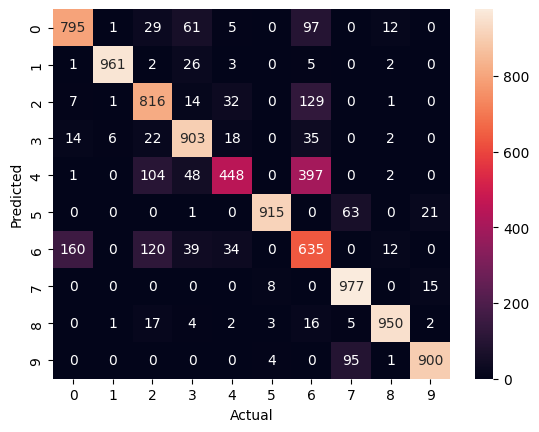

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='.3g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

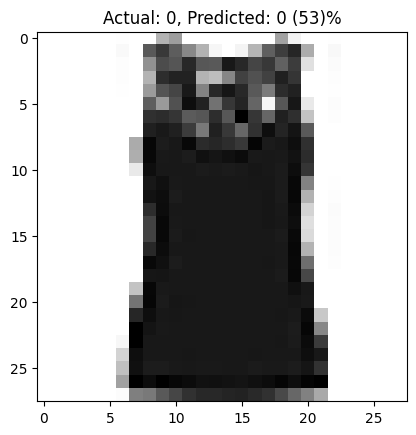

In [32]:
img_index = 8956
plt.imshow(X_test[img_index], plt.cm.binary)

predicted = y_pred_class[img_index]
predicted_proba = np.max(y_pred[img_index]) * 100
plt.title(f'Actual: {y_test[img_index]}, Predicted: {predicted} ({int(predicted_proba)})%')

plt.show()